In [1]:
# Manipulation data
import pandas as pd
import numpy as np

# Visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

# Default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [2]:
# Creating train DataFrame
train = pd.read_csv("data.csv")
train.tail()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [3]:
# Checking non-null entries
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Observing the different parameters for each features
train.describe(include="all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [5]:
# Removing Unwanted feature columns
train = train.drop(['Unnamed: 32', 'id'], axis=1)
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Transforming the diagnosis column containing gender of patients(M/F) to (1/0)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train.diagnosis = le.fit_transform(train.diagnosis)
train.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:
# Observing thr correlation matrix of the train DataFrame
train.corr().style.background_gradient(cmap='mako').set_precision(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


In [13]:
# Dropping unwanted columns according to the correlation matrix
train=train.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1)

In [14]:
# Creating X and y DataFrames
X = train.drop(['diagnosis'],axis=1)
y = train.diagnosis

[0.06290659 0.01950352 0.04126833 0.05461552 0.01014136 0.02320356
 0.04670673 0.10144988 0.0086092  0.03382957 0.0167389  0.02755746
 0.00823959 0.00677647 0.01004618 0.10493709 0.02777623 0.11237772
 0.10259002 0.02405549 0.03125548 0.02842082 0.0731615  0.01392518
 0.0099076 ]


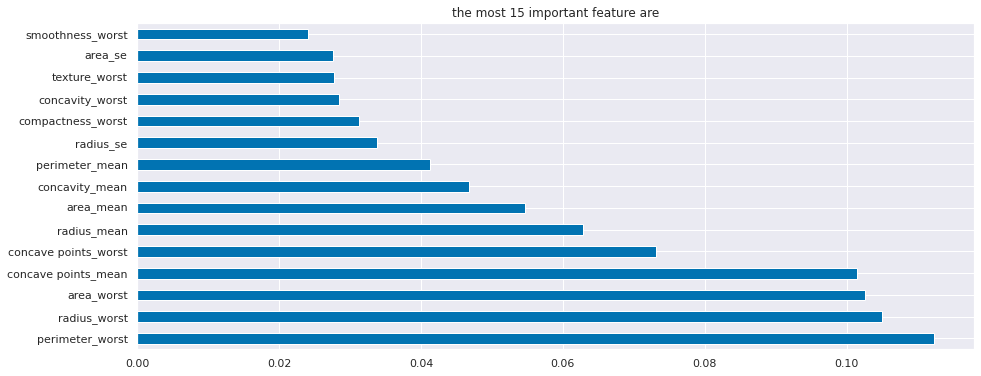

In [15]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

from sklearn.ensemble import ExtraTreesClassifier # Used to find out the important features from all the available ones

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('the most 15 important feature are')
plt.show()

In [16]:
cols = train.columns
cols

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
train=train.drop(['texture_mean','smoothness_mean','compactness_mean','symmetry_mean','perimeter_se','compactness_se','concavity_se','concave points_se','smoothness_worst','symmetry_worst','fractal_dimension_worst'],axis=1)

In [18]:
# Anomaly Data
# We are observing this from train.describe table done in above cells
# The man and max value of concavity_mean has drastic difference in them
outlier=train[train['concavity_mean']>=0.25]
outlier

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.990,122.80,1001.0,0.3001,0.14710,1.0950,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119,0.2654
68,0,9.029,58.79,250.5,0.3130,0.04375,0.3274,17.67,10.31,22.65,65.50,324.7,0.4365,1.2520,0.1750
78,1,20.180,143.70,1245.0,0.3754,0.16040,0.9317,116.40,23.37,31.72,170.30,1623.0,0.6164,0.7681,0.2508
82,1,25.220,171.50,1878.0,0.3339,0.18450,0.8973,120.00,30.00,33.62,211.70,2562.0,0.6076,0.6476,0.2867
108,1,22.270,152.80,1509.0,0.4264,0.18230,1.2150,170.00,28.40,28.01,206.80,2360.0,0.6997,0.9608,0.2910
112,0,14.260,97.83,629.9,0.3003,0.07798,0.3628,29.25,15.30,23.73,107.00,709.0,0.4193,0.6783,0.1505
122,1,24.250,166.20,1761.0,0.4268,0.20120,1.5090,233.00,26.02,23.99,180.90,2073.0,0.4244,0.5803,0.2248
129,1,19.790,130.40,1192.0,0.2545,0.11490,0.4953,63.33,22.63,33.58,148.70,1589.0,0.3861,0.5673,0.1732
152,0,9.731,63.78,300.2,0.4108,0.07857,0.8245,49.85,11.02,19.49,71.04,380.5,0.2772,0.8216,0.1571
162,1,19.590,130.70,1214.0,0.2508,0.12860,0.7364,97.07,26.73,26.39,174.90,2232.0,0.3846,0.6810,0.2247


In [19]:
# Due to anomalies present in concavity_mean we will remove the outliers
train = train[train['concavity_mean']<0.25]
train

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
1,1,20.57,132.90,1326.0,0.08690,0.07017,0.5435,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.19740,0.12790,0.7456,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.24140,0.10520,0.4956,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.19800,0.10430,0.7572,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
5,1,12.45,82.57,477.1,0.15780,0.08089,0.3345,27.19,15.470,23.75,103.40,741.6,0.52490,0.5355,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,11.20,70.67,386.0,0.00000,0.00000,0.3141,22.81,11.920,38.30,75.19,439.6,0.05494,0.0000,0.0000
564,1,21.56,142.00,1479.0,0.24390,0.13890,1.1760,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.14400,0.09791,0.7655,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.09251,0.05302,0.4564,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418


In [20]:
# Similarly removing the outliers present in perimeter_worst
outlier=train[train['perimeter_worst']>=165]
outlier

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
18,1,19.81,130.0,1260.0,0.1479,0.09498,0.7582,112.40,27.32,30.88,186.8,2398.0,0.3150,0.5372,0.2388
23,1,21.16,137.2,1404.0,0.1097,0.08632,0.6917,93.99,29.17,35.59,188.0,2615.0,0.2600,0.3155,0.2009
24,1,16.65,110.0,904.6,0.1525,0.09170,0.8068,102.60,26.46,31.56,177.0,2215.0,0.3578,0.4695,0.2095
42,1,19.07,128.3,1104.0,0.2107,0.09961,0.9811,104.90,24.09,33.17,177.4,1651.0,0.7444,0.7242,0.2493
56,1,19.21,125.5,1152.0,0.1323,0.08994,0.7275,102.50,26.14,28.14,170.1,2145.0,0.3511,0.3879,0.2091
70,1,18.94,123.6,1130.0,0.1080,0.07951,0.7888,96.05,24.86,26.58,165.9,1866.0,0.2336,0.2687,0.1789
164,1,23.27,152.1,1686.0,0.1324,0.09702,0.6642,97.85,28.01,28.22,184.2,2403.0,0.3583,0.3948,0.2346
181,1,21.09,142.7,1311.0,0.2487,0.14960,0.6298,81.46,26.68,33.48,176.5,2089.0,0.7584,0.6780,0.2903
198,1,19.18,127.5,1148.0,0.1114,0.06772,0.4357,54.22,23.36,32.06,166.4,1688.0,0.5601,0.3865,0.1708
218,1,19.80,129.7,1230.0,0.1272,0.08691,0.9553,124.40,25.73,28.64,170.3,2009.0,0.3235,0.3617,0.1820


In [21]:
train = train[train['perimeter_worst']<165]
train

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
1,1,20.57,132.90,1326.0,0.08690,0.07017,0.5435,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.19740,0.12790,0.7456,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.24140,0.10520,0.4956,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.19800,0.10430,0.7572,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
5,1,12.45,82.57,477.1,0.15780,0.08089,0.3345,27.19,15.470,23.75,103.40,741.6,0.52490,0.5355,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0,14.05,91.38,600.4,0.04462,0.04304,0.3645,29.84,15.300,33.17,100.20,706.7,0.22640,0.1326,0.1048
561,0,11.20,70.67,386.0,0.00000,0.00000,0.3141,22.81,11.920,38.30,75.19,439.6,0.05494,0.0000,0.0000
565,1,20.13,131.20,1261.0,0.14400,0.09791,0.7655,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.09251,0.05302,0.4564,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418


In [22]:
#######
## Machine Learning
#######

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
x=train.drop('diagnosis',axis=1)
y=train.diagnosis

In [25]:
print(x.shape, y.shape)

(520, 14) (520,)


In [26]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [27]:
x_train

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
1,20.57,132.90,1326.0,0.086900,0.07017,0.5435,74.08,24.99,23.41,158.80,1956.0,0.18660,0.24160,0.18600
193,12.34,81.15,477.4,0.108500,0.04562,0.4053,34.44,15.65,39.34,101.70,768.9,0.47060,0.44250,0.14590
296,10.91,69.14,363.7,0.012360,0.01369,0.1753,11.09,11.37,14.82,72.42,392.2,0.07506,0.02884,0.03194
342,11.06,71.49,373.9,0.053970,0.03341,0.1601,10.80,11.92,19.90,79.76,440.0,0.22100,0.22990,0.10750
326,14.11,90.03,616.5,0.017650,0.02733,0.2571,23.92,15.53,18.00,98.40,749.9,0.11090,0.05307,0.05890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,13.16,84.06,538.7,0.018000,0.01256,0.3237,26.07,14.50,28.46,95.29,648.3,0.16460,0.07698,0.04195
249,11.52,73.87,406.3,0.043280,0.02929,0.2562,18.62,12.65,21.19,80.88,491.8,0.15820,0.18040,0.09608
435,13.98,91.12,599.5,0.112600,0.06463,0.2208,18.85,17.04,30.80,113.90,869.3,0.35680,0.40690,0.18270
565,20.13,131.20,1261.0,0.144000,0.09791,0.7655,99.04,23.69,38.25,155.00,1731.0,0.19220,0.32150,0.16280


In [28]:
y_train

1      1
193    1
296    0
342    0
326    0
      ..
494    0
249    0
435    1
565    1
493    0
Name: diagnosis, Length: 364, dtype: int64

In [29]:
# Importing scaler
# Standard Scaler transforms the data such that the mean of the distribution is 0 and standard deviation 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
x_test

array([[ 0.16933717,  0.09735856,  0.072844  , ..., -0.75695493,
        -0.7031141 , -0.50809067],
       [-0.69940126, -0.720618  , -0.6981845 , ..., -0.49322052,
        -0.86344513, -0.98338084],
       [ 0.97205147,  1.07689186,  0.94726128, ...,  1.64979791,
         2.66011951,  2.10045036],
       ...,
       [-1.86142578, -1.84285126, -1.48866993, ..., -0.68291185,
        -0.9447937 , -1.35677351],
       [ 1.83036504,  1.82606665,  1.97580796, ...,  0.80218088,
         0.87146512,  1.16306289],
       [-0.53955339, -0.55651304, -0.56770862, ..., -0.22737058,
        -0.05525503, -0.47701801]])

In [32]:
############
## MODELS ##
############

0.9743589743589743 %


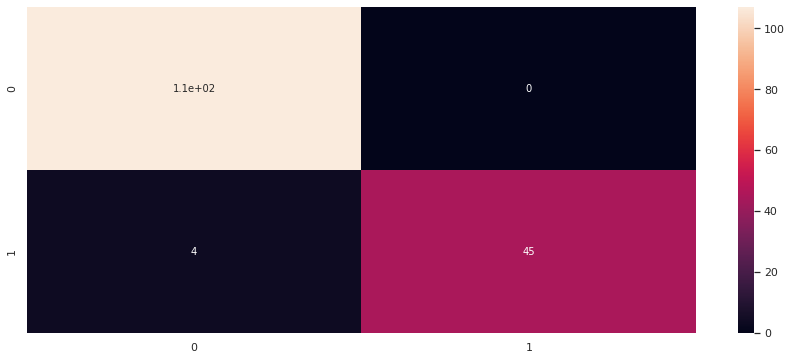

In [34]:
# Logistic Regression

# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

# Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
sns.heatmap(cm, annot=True)
print(acc_logreg,'%')


In [ ]:
# Importing joblib to save model and scaler

from sklearn.externals import joblib
joblib.dump(model, 'cancer_model.pkl')
joblib.dump(sc, 'cancer_sc.pkl')

['cancer_sc.pkl']

In [ ]:
classifier = joblib.load("cancer_model.pkl")
scanner = joblib.load("cancer_sc.pkl")

# data = np.array([ [7.76,	47.92,	181.0,	0.0,	0.0, 0.3857,	19.15,	9.456,	30.37,	59.16,	268.6,	0.06444,	0.0,	0.0]])
# data = sc.transform(data)
data = scanner.transform(np.array([[9.173,	59.20,	260.9,	0.05988,	0.02180,	0.4098,	23.520,	10.01,	19.23,	65.59,	310.1,	0.16780,	0.1397,	0.05087]]))
y_predic = classifier.predict(data)
print(y_predic)

[0]


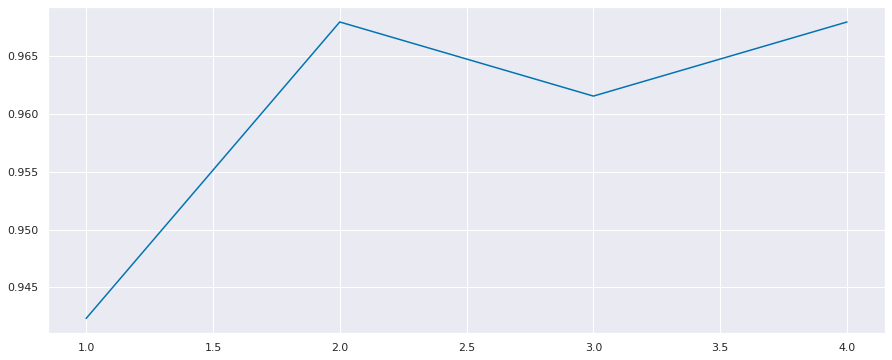

In [ ]:
# kNN

# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0
 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1
 1 0 0 0 0 0 0 1]
[[111   4]
 [  2  39]]
0.9615384615384616


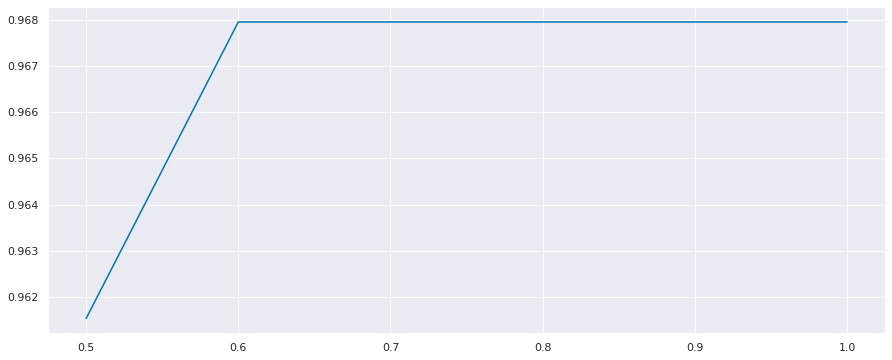

[[112   3]
 [  2  39]]
0.967948717948718 %


In [ ]:
# SVM

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

# Training the Support Vector Classifier on the Training set
classifier = SVC(C = 0.9, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(x_test)
# print(y_pred)

# Making the confusion matrix and calculating accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc,'%')
mylist.append(acc_svc)

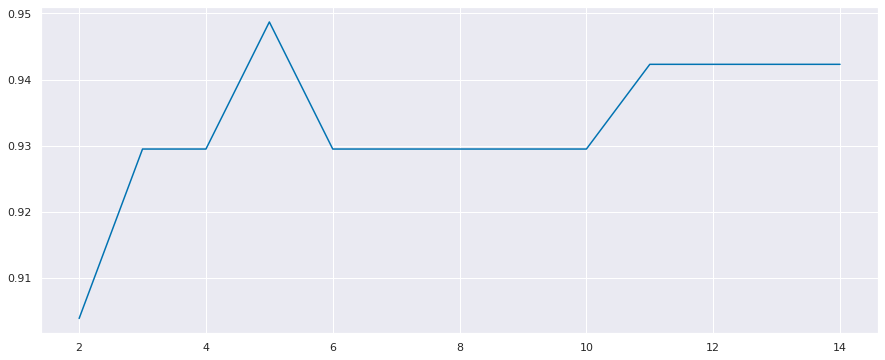

[[111   4]
 [  5  36]]
0.9423076923076923


In [ ]:
# Decision Tree

# Finding the optimum number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

# Training the Decision Tree Classifier on the Training set
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

# Making the confusion matrix and calculating accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

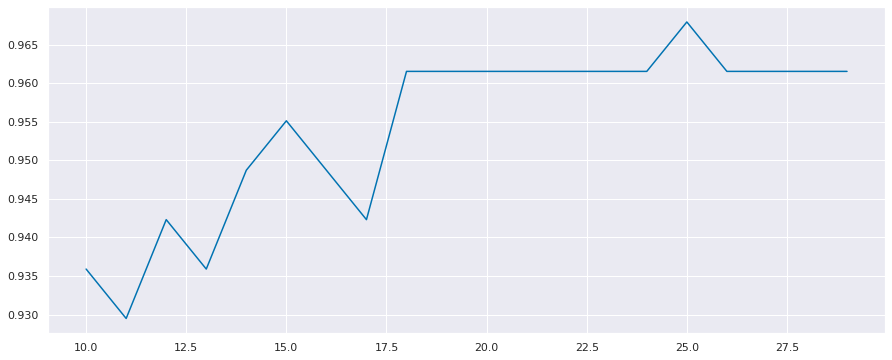

[[114   1]
 [  5  36]]
0.9615384615384616


In [ ]:
# Random Forest

#Finding the optimum number of n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()


# Training the RandomForest Classifier on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

# Making the confusion matrix and calculating the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

In [ ]:
# ANN (Neural Network)

np.random.seed(0)
import tensorflow as tf

# Initialising the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the third hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the fourth hidden layer
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# Training the ANN on the training set
ann.fit(x_train, y_train, batch_size = 16, epochs = 100)


Epoch 1/100
23/23 [==============================] - 1s 1ms/step - loss: 0.7094 - accuracy: 0.4051
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.7810
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.9310
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.9359
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.9244
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.9241
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.9454
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.9431
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.2542 - accuracy: 0.9506
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.1583 - accuracy: 0.9729
Epoch 11/

In [ ]:
# Predicting the test set results
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

In [ ]:
# Making the confusion matrix, calculating accuracy_score 
from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

Confusion Matrix
[[113   2]
 [  3  38]]

Accuracy
0.967948717948718


In [ ]:
###### FINAL ######

In [ ]:
# Logistic Regression
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

[[99  2]
 [ 1 62]]
0.9817073170731707 %


In [ ]:
import pickle
pickle.dump(model, open("cancer_regresion.pkl", "wb"))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pickle.dump(sc, open("scalar.pkl", "wb"))

In [ ]:
x_test.shape

(164, 14)

In [ ]:
x, y

(     radius_mean  perimeter_mean  ...  concavity_worst  concave points_worst
 1          20.57          132.90  ...           0.2416                0.1860
 2          19.69          130.00  ...           0.4504                0.2430
 3          11.42           77.58  ...           0.6869                0.2575
 4          20.29          135.10  ...           0.4000                0.1625
 5          12.45           82.57  ...           0.5355                0.1741
 ..           ...             ...  ...              ...                   ...
 561        11.20           70.67  ...           0.0000                0.0000
 564        21.56          142.00  ...           0.4107                0.2216
 565        20.13          131.20  ...           0.3215                0.1628
 566        16.60          108.30  ...           0.3403                0.1418
 568         7.76           47.92  ...           0.0000                0.0000
 
 [544 rows x 14 columns], 1      1
 2      1
 3      1
 4     

In [ ]:
cols = x.columns
cols

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [ ]:
# y = 1
# data = np.array([[12.45,	82.57,	477.1,	0.15780,	0.08089,	0.3345,	27.19,	15.470,	23.75,	103.40,	741.6,	0.52490,	0.5355,	0.1741]])
# [[7.76,	47.92,	181.0,	0.00000,	0.00000,	0.3857,	19.15,	9.456,	30.37,	59.16,	268.6,	0.06444,	0.0000,	0.0000]]
data = np.array([[9.173,	59.20,	260.9,	0.05988,	0.02180,	0.4098,	23.520,	10.01,	19.23,	65.59,	310.1,	0.16780,	0.1397,	0.05087]])
data = sc.transform(data)

In [ ]:
clf = pickle.load(open("cancer_regresion.pkl", "rb"))

In [ ]:
clf.predict(data)

array([1])

In [ ]:
pickle.dump(x, open("x_without_scaling.pkl", "wb"))

In [ ]:
pickle.dump(y, open("y.pkl", "wb"))

In [ ]:
x.tail(10)

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
555,10.290,65.67,321.4,0.059990,0.02738,0.2199,14.46,10.840,34.91,69.57,357.6,0.17100,0.20000,0.09127
556,10.160,64.73,311.7,0.005025,0.01116,0.2441,16.80,10.650,22.88,67.88,347.3,0.12000,0.01005,0.02232
557,9.423,59.26,271.3,0.000000,0.00000,0.5375,29.11,10.490,34.24,66.50,330.6,0.07158,0.00000,0.00000
558,14.590,96.39,657.1,0.102900,0.03736,0.2254,19.54,15.480,27.27,105.90,733.5,0.31710,0.36620,0.11050
559,11.510,74.52,403.5,0.111200,0.04105,0.2388,16.97,12.480,37.16,82.28,474.2,0.25170,0.36300,0.09653
560,14.050,91.38,600.4,0.044620,0.04304,0.3645,29.84,15.300,33.17,100.20,706.7,0.22640,0.13260,0.10480
561,11.200,70.67,386.0,0.000000,0.00000,0.3141,22.81,11.920,38.30,75.19,439.6,0.05494,0.00000,0.00000
565,20.130,131.20,1261.0,0.144000,0.09791,0.7655,99.04,23.690,38.25,155.00,1731.0,0.19220,0.32150,0.16280
566,16.600,108.30,858.1,0.092510,0.05302,0.4564,48.55,18.980,34.12,126.70,1124.0,0.30940,0.34030,0.14180
568,7.760,47.92,181.0,0.000000,0.00000,0.3857,19.15,9.456,30.37,59.16,268.6,0.06444,0.00000,0.00000


In [ ]:
x_test.shape, y_test.shape

((156, 14), (156,))

In [ ]:
pickle.dump(x_test, open("x_test.pkl", "wb"))

In [ ]:
pickle.dump(y_test, open("y_test.pkl", "wb"))

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1])

In [ ]:
x, y_train

(     radius_mean  perimeter_mean  ...  concavity_worst  concave points_worst
 1          20.57          132.90  ...           0.2416                0.1860
 2          19.69          130.00  ...           0.4504                0.2430
 3          11.42           77.58  ...           0.6869                0.2575
 4          20.29          135.10  ...           0.4000                0.1625
 5          12.45           82.57  ...           0.5355                0.1741
 ..           ...             ...  ...              ...                   ...
 560        14.05           91.38  ...           0.1326                0.1048
 561        11.20           70.67  ...           0.0000                0.0000
 565        20.13          131.20  ...           0.3215                0.1628
 566        16.60          108.30  ...           0.3403                0.1418
 568         7.76           47.92  ...           0.0000                0.0000
 
 [520 rows x 14 columns], 358    0
 455    0
 190    1
 445   

In [ ]:
y_test

531    0
206    0
270    0
288    0
289    0
      ..
20     0
221    0
309    0
63     0
62     1
Name: diagnosis, Length: 156, dtype: int64

In [ ]:

data = np.array([ [7.76,	47.92,	181.0,	0.0,	0.0, 0.3857,	19.15,	9.456,	30.37,	59.16,	268.6,	0.06444,	0.0,	0.0]])
data = sc.transform(data)

y_predic = clf.predict(data)
print(y_predic)


[1]


In [ ]:

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(data)

array([1])

In [ ]:
y_pred, y_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1]), 531    0
 206    0
 270    0
 288    0
 289    0
       ..
 20     0
 221    0
 309    0
 63     0
 62     1
 Name: diagnosis, Length: 156, dtype: int64)

In [ ]:
x_test[:5]

array([[-0.64056086, -0.63294794, -0.6607203 , -0.54663892, -0.68435221,
        -0.78698349, -0.69027486, -0.54307762,  0.55499256, -0.54210783,
        -0.55925167,  0.40225443,  0.16720409, -0.42485255],
       [-1.24926393, -1.24532966, -1.11025989, -0.94353379, -0.74926783,
        -0.75183003, -0.80798537, -1.30475807, -0.36776233, -1.30499165,
        -1.10682055, -0.76747   , -0.99862957, -0.85472609],
       [ 0.24840349,  0.11895118,  0.14458074, -1.11096367, -1.16947769,
        -1.17116053, -0.86899148, -0.13754127, -0.79199848, -0.25717533,
        -0.22420952, -1.27391911, -1.12668739, -1.2375716 ],
       [-0.7796736 , -0.70719113, -0.74296223,  0.2773564 ,  0.40211352,
         0.61865252,  0.06604451, -0.93041683, -0.51467679, -0.87644396,
        -0.84178721, -0.36143869, -0.49409155, -0.22213967],
       [-0.74235067, -0.78442398, -0.73589166, -0.83911342, -0.67928563,
        -0.49119227, -0.60619592, -0.80043723,  0.11424917, -0.83738064,
        -0.78753039, -0.95

In [ ]:
y_test[-30:]

541    0
282    1
127    1
243    0
544    0
191    0
408    1
241    0
412    0
506    0
86     1
423    0
510    0
110    0
319    0
387    0
465    0
119    1
290    0
134    1
178    0
72     1
262    1
515    0
67     0
20     0
221    0
309    0
63     0
62     1
Name: diagnosis, dtype: int64

In [ ]:
sc.transform([[11.200,	70.67,	386.0,	0.000000,	0.00000,	0.3141,	22.81,	11.920,	38.30,	75.19,	439.6,	0.05494,	0.00000 , 0.00000]])

array([[ 1.12000000e+01,  7.06700000e+01,  3.86000000e+02,
         2.44005060e-17,  6.10012651e-18,  3.14100000e-01,
         2.28100000e+01,  1.19200000e+01,  3.83000000e+01,
         7.51900000e+01,  4.39600000e+02,  5.49400000e-02,
         9.76020241e-18, -1.22002530e-17]])

In [ ]:
model.predict([[ 1.12000000e+01,  7.06700000e+01,  3.86000000e+02,
         2.44005060e-17,  6.10012651e-18,  3.14100000e-01,
         2.28100000e+01,  1.19200000e+01,  3.83000000e+01,
         7.51900000e+01,  4.39600000e+02,  5.49400000e-02,
         9.76020241e-18, -1.22002530e-17]])

array([1])